### Importación de datos



In [1]:
# Importar librerias para abrir archivos
# Antes que nada SUBIR los archivos de datos

from urllib.request import urlopen
import csv

url1 = "/content/sample_data/tienda_1.csv"
url2 = "/content/sample_data/tienda_2.csv"
url3 = "/content/sample_data/tienda_3.csv"
url4 = "/content/sample_data/tienda_4.csv"

urls = [url1, url2, url3, url4]

In [2]:
# Leer un CSV desde un PATH local
def leer_csv(url):
    datos = []
    # Abre el archivo localmente en modo lectura ('r')
    with open(url, 'r', encoding='utf-8') as archivo:
        # csv.DictReader puede leer directamente desde el objeto archivo
        lector = csv.DictReader(archivo)
        for fila in lector:
            datos.append(fila)
    return datos

#1. Análisis de facturación



In [3]:
# Análisis de facturación
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])
        facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturación total
print(f"\nFacturación de todas las tiendas: ${total_facturacion:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación de todas las tiendas: $4403619200.00


# 2. Ventas por categoría

In [4]:
# TOTAL FACTURACION POR TIENDA Y TOTAL GENERAL

total_facturacion = 0
total_envio = 0

for i, url in enumerate(urls):
  datos_tienda = leer_csv(url)
  facturacion_tienda = 0
  envio_tienda = 0

  for venta in datos_tienda:
    precio = float(venta['Precio'])
    envio = float(venta['Costo de envío'])
    facturacion_tienda += precio
    envio_tienda += envio

  print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
  print(f"Envio Tienda {i+1}: ${envio_tienda:.2f}")
  total_facturacion += facturacion_tienda
  total_envio += envio_tienda

# Mostrar facturación total
print(f"\nFacturación de todas las tiendas: ${total_facturacion:.2f}")

Facturación Tienda 1: $1150880400.00
Envio Tienda 1: $61377900.00
Facturación Tienda 2: $1116343500.00
Envio Tienda 2: $59485100.00
Facturación Tienda 3: $1098019600.00
Envio Tienda 3: $58516600.00
Facturación Tienda 4: $1038375700.00
Envio Tienda 4: $55317400.00

Facturación de todas las tiendas: $4403619200.00


In [5]:
# TOTAL FACTURACION POR TIENDA Y POR CATEGORIA

# Diccionario para almacenar ventas por categoría
ventas_por_categoria = {}

# Procesar las tiendas
for i, url in enumerate(urls):
  datos_tienda = leer_csv(url)
  print(f"\nVentas por categoría en Tienda {i+1}:")

  # Diccionario para la tienda actual
  categorias_tienda = {}

  for venta in datos_tienda:
    # Manejo de ERRORES
    categoria = venta.get('Categoría del Producto', 'Desconocida')
    try:
      # Asegurar que precio es FLOAT
      precio = float(venta.get('Precio', 0))
    except (ValueError, TypeError) as e:
      print(f"Warning: Could not process venta due to data error: {venta}. Error: {e}")
      continue # Continua si el precio no coincide con el formato

    monto_venta = precio

    # Agregar al diccionario de la tienda actual
    if categoria in categorias_tienda:
      categorias_tienda[categoria] += monto_venta
    else:
      categorias_tienda[categoria] = monto_venta

    # Agregar al diccionario general
    if categoria in ventas_por_categoria:
      ventas_por_categoria[categoria] += monto_venta
    else:
      ventas_por_categoria[categoria] = monto_venta

  # Mostrar resultados para esta tienda
  for categoria, monto in categorias_tienda.items():
    print(f"  {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
  print(f"  {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categoría en Tienda 1:
  Electrónicos: $429493500.00
  Muebles: $187633700.00
  Juguetes: $17995700.00
  Electrodomésticos: $363685200.00
  Artículos para el hogar: $12698400.00
  Deportes y diversión: $39290000.00
  Libros: $8784900.00
  Instrumentos musicales: $91299000.00

Ventas por categoría en Tienda 2:
  Muebles: $176426300.00
  Instrumentos musicales: $104990300.00
  Deportes y diversión: $34744500.00
  Electrónicos: $410831100.00
  Artículos para el hogar: $14746900.00
  Juguetes: $15945400.00
  Electrodomésticos: $348567800.00
  Libros: $10091200.00

Ventas por categoría en Tienda 3:
  Electrodomésticos: $329237900.00
  Muebles: $201072100.00
  Instrumentos musicales: $77380900.00
  Deportes y diversión: $35593100.00
  Electrónicos: $410775800.00
  Juguetes: $19401100.00
  Artículos para el hogar: $15060000.00
  Libros: $9498700.00

Ventas por categoría en Tienda 4:
  Electrodomésticos: $283260200.00
  Muebles: $192528900.00
  Deportes y diversión: $33350100.00
  

# 3. Calificación promedio de la tienda


In [6]:
# CALIFICACION PROMEDIO DE LA TIENDA

# Uso pandas a partir de ahora

import pandas as pd

for i, url in enumerate(urls):
  datos_tienda = pd.read_csv(url)
  califica = pd.DataFrame(datos_tienda)

  califica['Calificación'] = pd.to_numeric(califica['Calificación'], errors='coerce')

  calificacion_promedio = califica['Calificación'].mean()

  if not pd.isna(calificacion_promedio):
    print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
  else:
    print(f"No se encontraron calificaciones válidas para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [7]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat([pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],ignore_index=True)

df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Función para mostrar los 3 productos que más y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista única de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Envío promedio por tienda

In [8]:
# Chequear que el costo de envío es numérico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


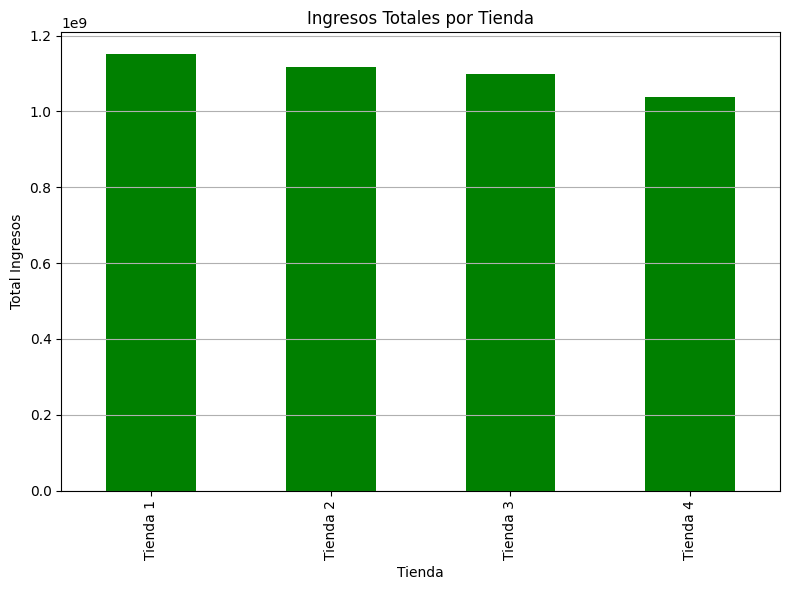

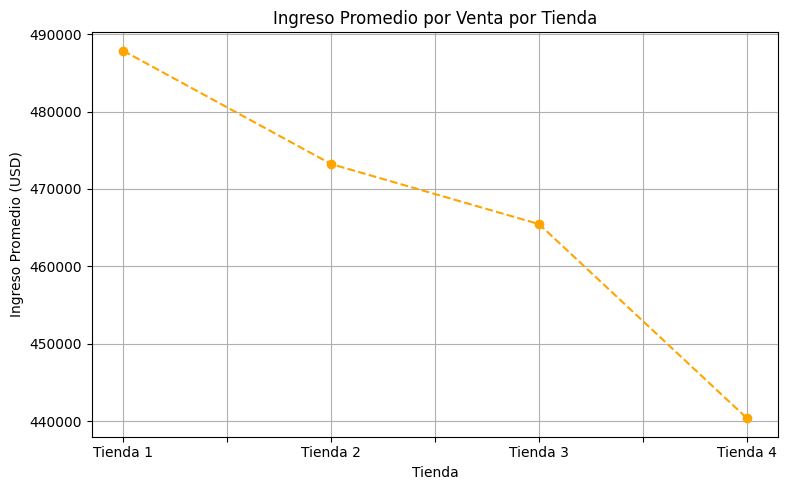

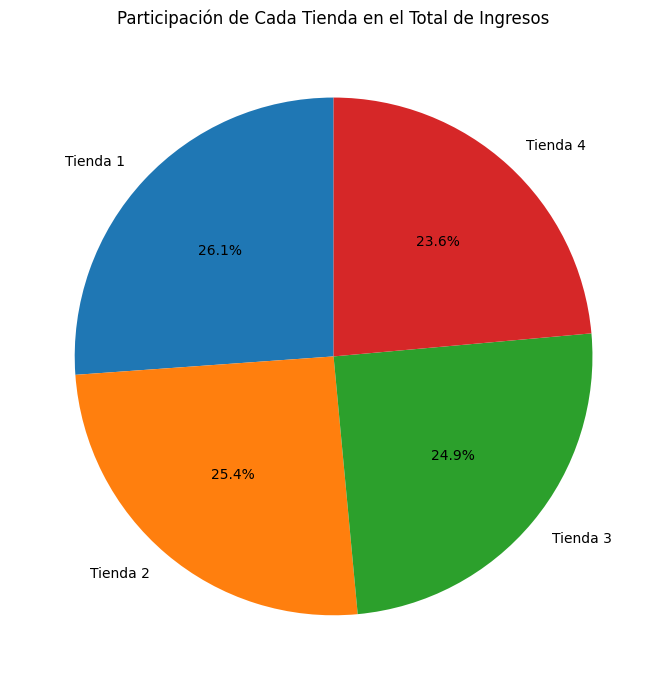

In [9]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar tipo
df_total['Precio'] = df_total['Precio'].astype(float)

# El ingreso de cada venta es el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# Total de ingresos
plt.figure(figsize=(8,6))
ingresos_totales.plot(kind='bar', color='Green')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribución del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Graficos VARIOS

In [10]:
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

In [11]:
# Función para mostrar los 3 productos que más y menos dinero generaron

def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]
    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    return data

df_tienda_1 = top_productos('Tienda 1')
df_tienda_2 = top_productos('Tienda 2')
df_tienda_3 = top_productos('Tienda 3')
df_tienda_4 = top_productos('Tienda 4')

print("\nData for Tienda 1:")
display(df_tienda_1.head()),display(df_tienda_2.head()),display(df_tienda_3.head()),display(df_tienda_4.head())


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

,Tienda,Producto,Ingreso
0,Tienda 1,Ajedrez de madera,1430600.0
1,Tienda 1,Armario,29462300.0
2,Tienda 1,Asistente virtual,8058000.0
3,Tienda 1,Auriculares,5043700.0
4,Tienda 1,Auriculares con micrófono,4730800.0


,Tienda,Producto,Ingreso
51,Tienda 2,Ajedrez de madera,1287700.0
52,Tienda 2,Armario,26174900.0
53,Tienda 2,Asistente virtual,7929500.0
54,Tienda 2,Auriculares,3569600.0
55,Tienda 2,Auriculares con micrófono,5644300.0


,Tienda,Producto,Ingreso
102,Tienda 3,Ajedrez de madera,1355300.0
103,Tienda 3,Armario,24187200.0
104,Tienda 3,Asistente virtual,8013300.0
105,Tienda 3,Auriculares,3959400.0
106,Tienda 3,Auriculares con micrófono,5970500.0


,Tienda,Producto,Ingreso
153,Tienda 4,Ajedrez de madera,1075500.0
154,Tienda 4,Armario,16421400.0
155,Tienda 4,Asistente virtual,10467300.0
156,Tienda 4,Auriculares,3943600.0
157,Tienda 4,Auriculares con micrófono,6402900.0


(None, None, None, None)

In [12]:
top_mas_vendidos = df_tienda_1.sort_values(by='Ingreso', ascending=False).head(3)
top_menos_vendidos = df_tienda_1.sort_values(by='Ingreso', ascending=True).head(3)
top_mas_vendidos,top_menos_vendidos


(      Tienda       Producto      Ingreso
 48  Tienda 1  TV LED UHD 4K  142150200.0
 39  Tienda 1   Refrigerador  112143300.0
 25  Tienda 1      Iphone 15   97902200.0,
       Tienda            Producto   Ingreso
 17  Tienda 1  Cuerda para saltar  652800.0
 19  Tienda 1      Dinosaurio Rex  688900.0
 16  Tienda 1     Cubo mágico 8x8  696900.0)

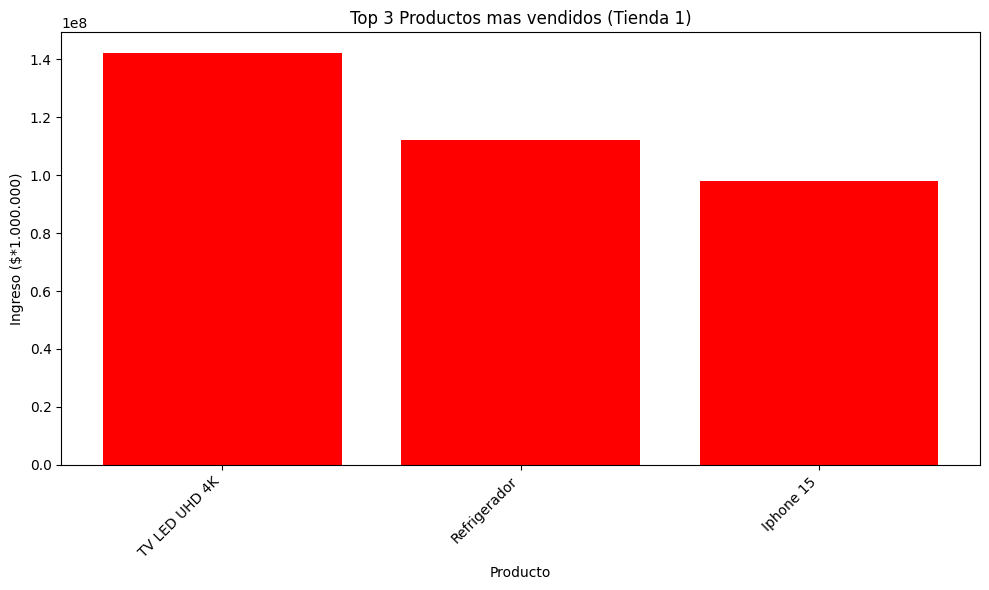

In [13]:
# Grafico de los productos mas vendidos para la Tienda 1

plt.figure(figsize=(10, 6))
plt.bar(top_mas_vendidos['Producto'], top_mas_vendidos['Ingreso'], color='red')
plt.title('Top 3 Productos mas vendidos (Tienda 1)')
plt.xlabel('Producto')
plt.ylabel('Ingreso ($*1.000.000)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

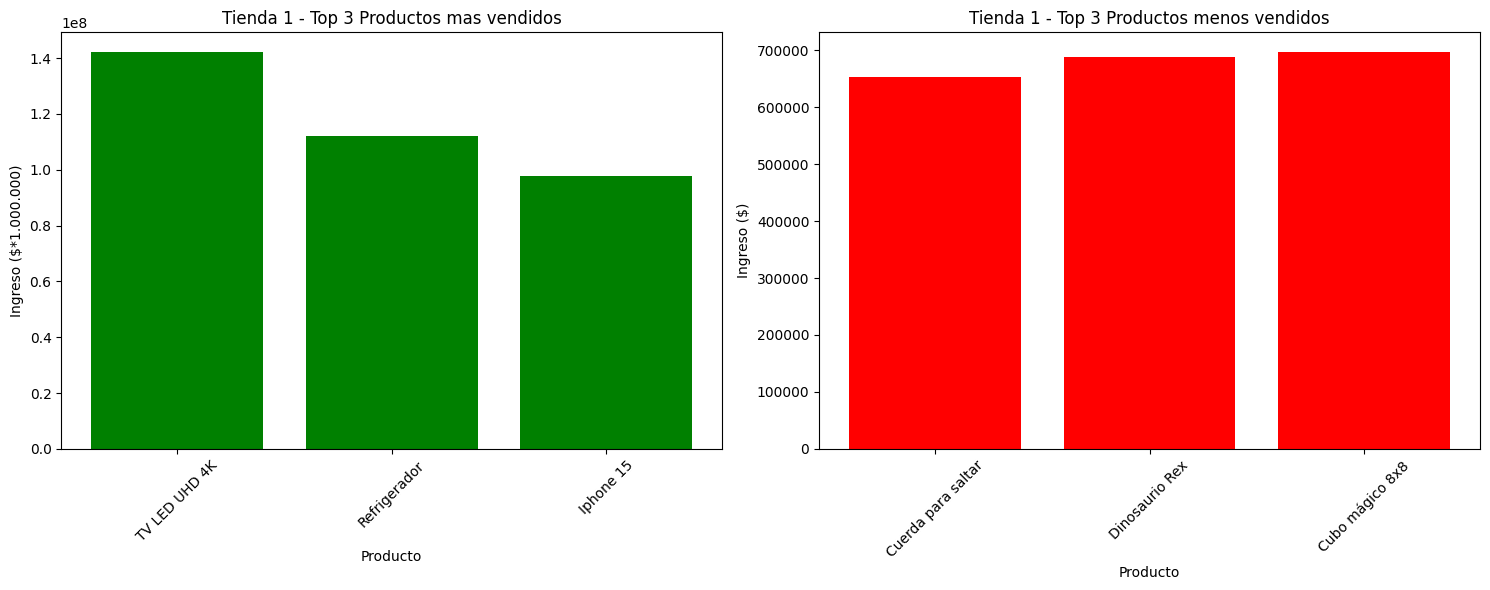

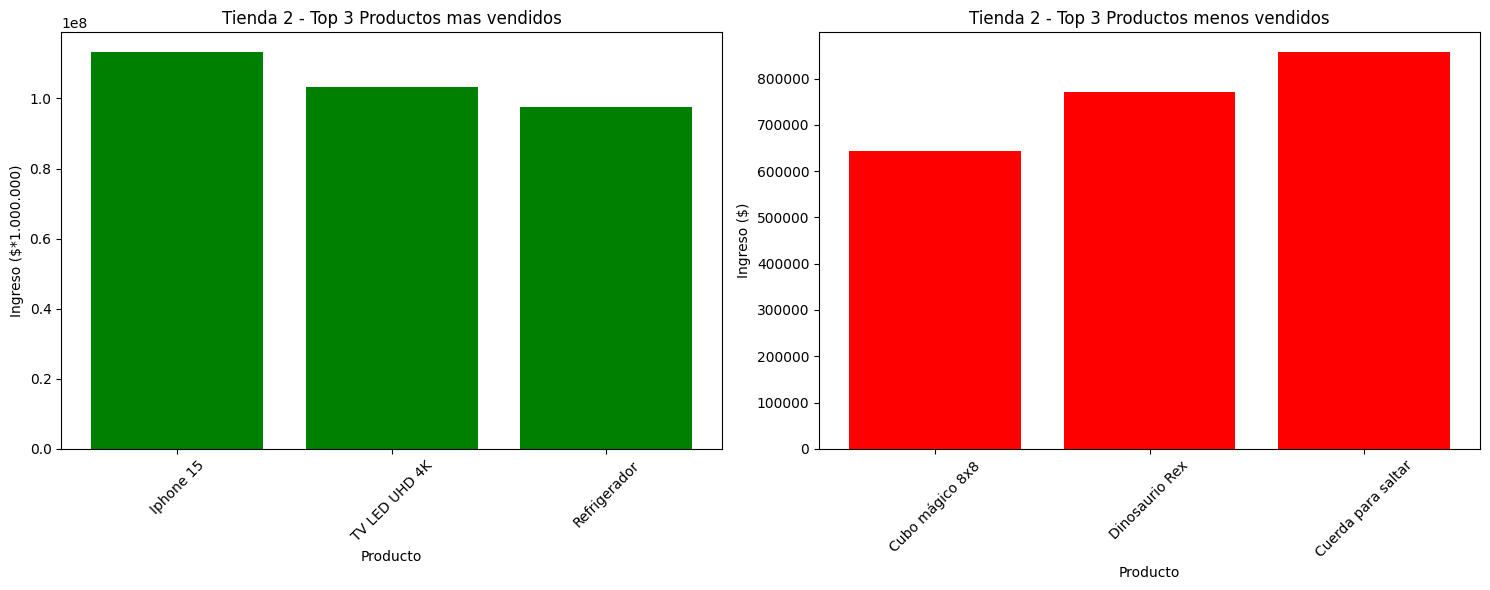

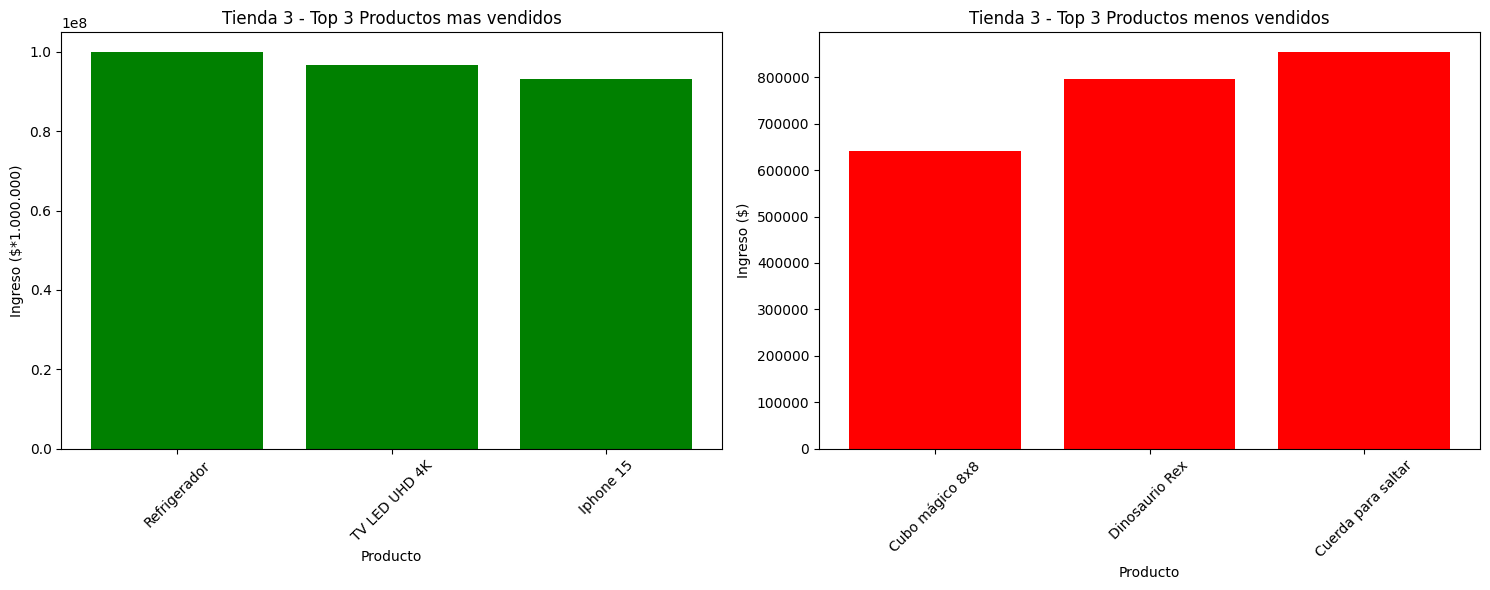

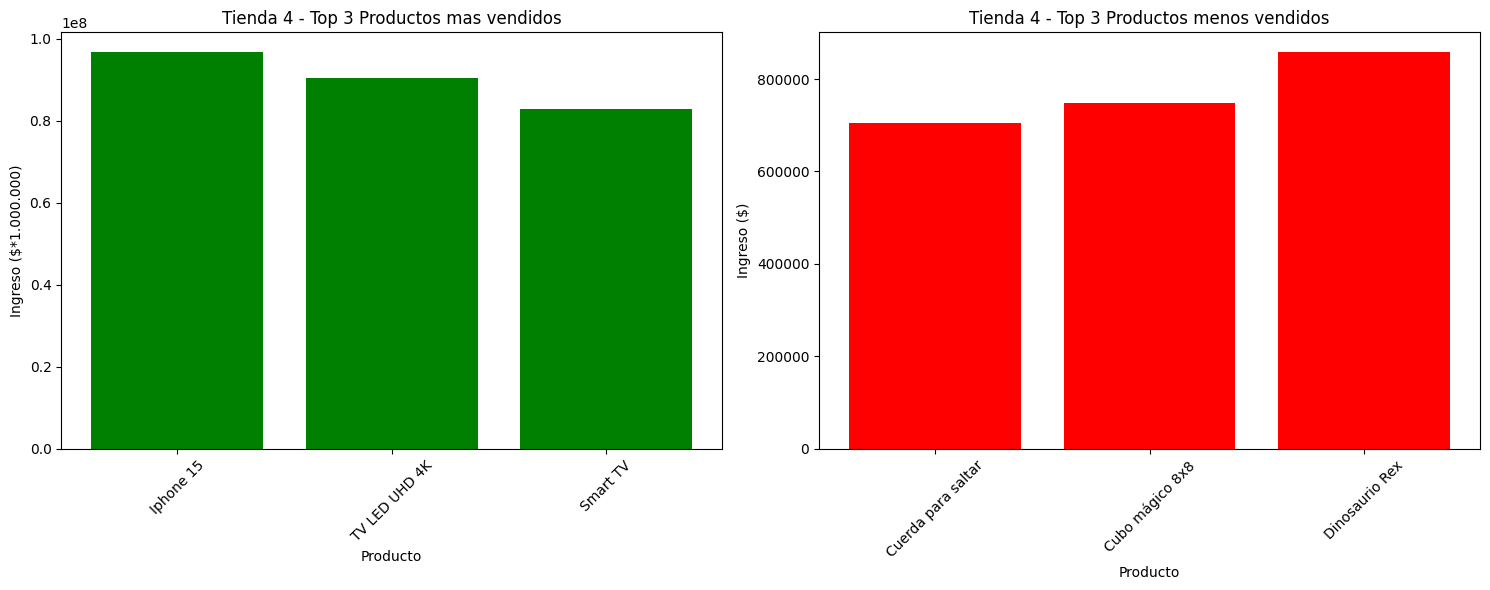

In [14]:

# tiendas_unicas es una lista que contiene los nombres de las tiendas

# Iterando en las tiendas
for tienda in tiendas_unicas:
    data_tienda = ventas[ventas['Tienda'] == tienda]
    top_mas_vendidos = data_tienda.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data_tienda.sort_values(by='Ingreso', ascending=True).head(3)

    # Creando un subplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    axes[0].bar(top_mas_vendidos['Producto'], top_mas_vendidos['Ingreso'], color='green')
    axes[0].set_title(f'{tienda} - Top 3 Productos mas vendidos')
    axes[0].set_xlabel('Producto')
    axes[0].set_ylabel('Ingreso ($*1.000.000)')
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(top_menos_vendidos['Producto'], top_menos_vendidos['Ingreso'], color='red')
    axes[1].set_title(f'{tienda} - Top 3 Productos menos vendidos')
    axes[1].set_xlabel('Producto')
    axes[1].set_ylabel('Ingreso ($)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()

    plt.show()

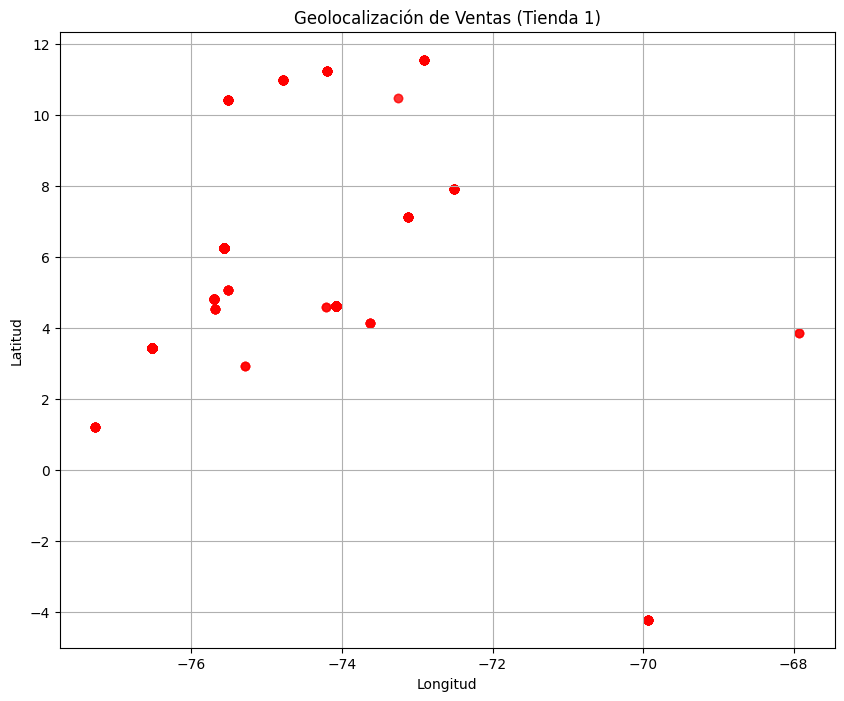

In [25]:
lat_lon_1=pd.read_csv(url1, usecols=['lat','lon'])
lat_lon_1

plt.figure(figsize=(10, 8))
plt.scatter(lat_lon_1['lon'], lat_lon_1['lat'], alpha=0.4, color='red')
plt.title('Geolocalización de Ventas (Tienda 1)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

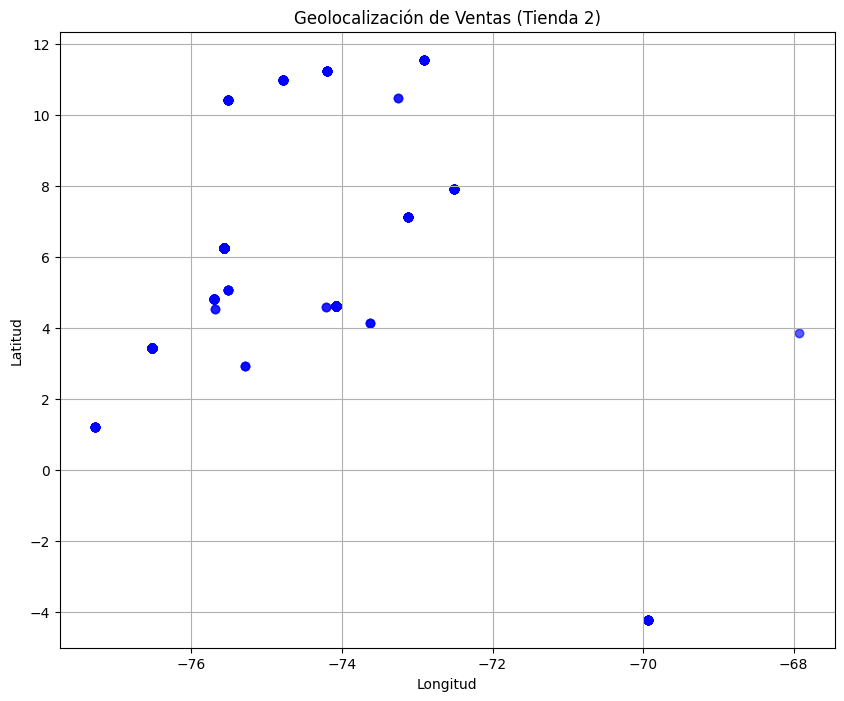

In [16]:
lat_lon_2=pd.read_csv(url2, usecols=['lat','lon'])
lat_lon_2

plt.figure(figsize=(10, 8))
plt.scatter(lat_lon_2['lon'], lat_lon_2['lat'], alpha=0.4, color='blue')
plt.title('Geolocalización de Ventas (Tienda 2)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

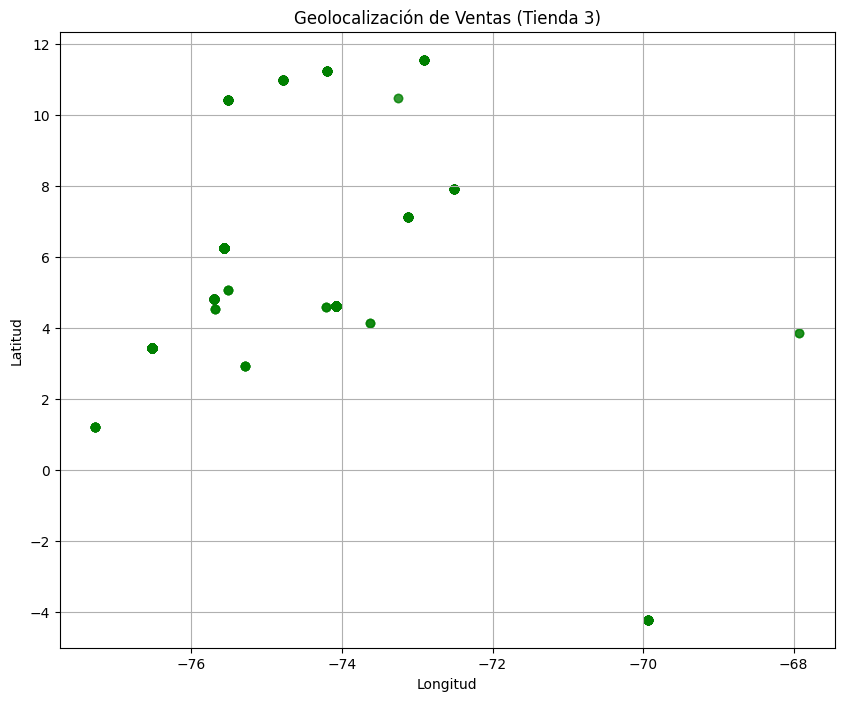

In [26]:
lat_lon_3=pd.read_csv(url3, usecols=['lat','lon'])
lat_lon_3

plt.figure(figsize=(10, 8))
plt.scatter(lat_lon_3['lon'], lat_lon_3['lat'], alpha=0.4, color='green')
plt.title('Geolocalización de Ventas (Tienda 3)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

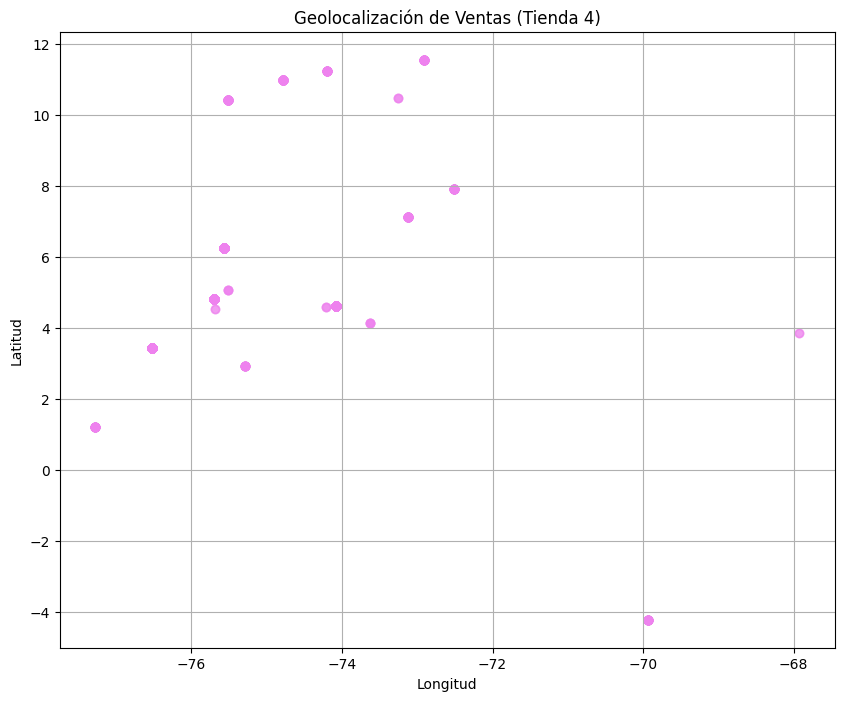

In [27]:
lat_lon_4=pd.read_csv(url4, usecols=['lat','lon'])
lat_lon_4

plt.figure(figsize=(10, 8))
plt.scatter(lat_lon_4['lon'], lat_lon_4['lat'], alpha=0.4, color='violet')
plt.title('Geolocalización de Ventas (Tienda 4)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

In [19]:
!pip install cartopy

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


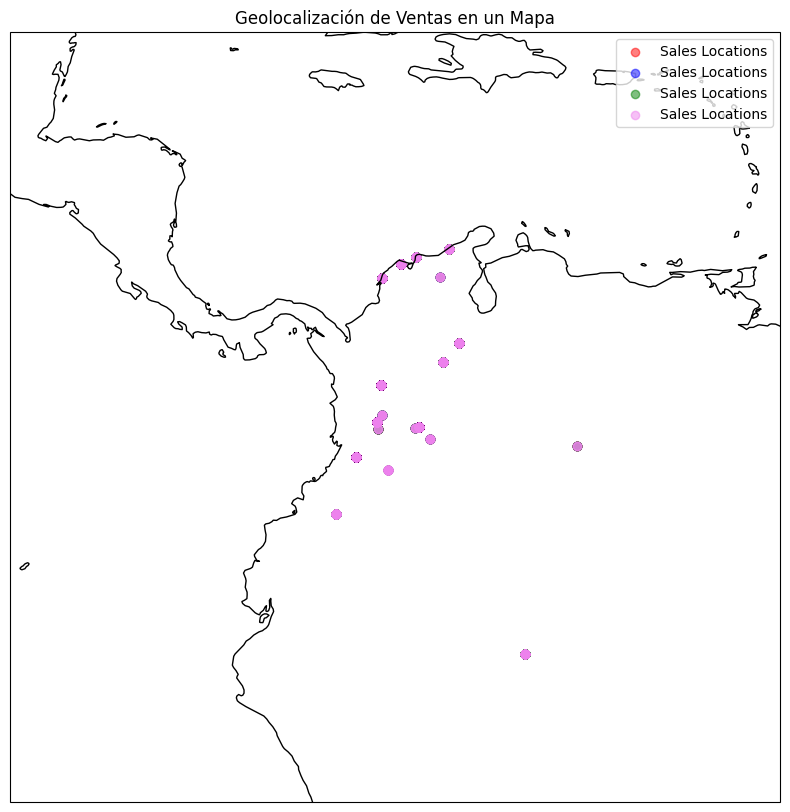

In [20]:
# Referencia
# 7.885231, -75.796620

plt.figure(figsize=(10, 10))
# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() # Add coastlines for context
ax.set_extent([-120, -70, 0, 50]) # Set the extent of the map (example coordinates)

# Scatter plot on the map
plt.scatter(lat_lon_1['lon'], lat_lon_1['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='red', label='Sales Locations')
plt.scatter(lat_lon_2['lon'], lat_lon_2['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='blue', label='Sales Locations')
plt.scatter(lat_lon_3['lon'], lat_lon_3['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='green', label='Sales Locations')
plt.scatter(lat_lon_4['lon'], lat_lon_4['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='violet', label='Sales Locations')

ax.set_xlim(-90, -60)
ax.set_ylim(-10, 20)

plt.title('Geolocalización de Ventas en un Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()


In [21]:
# Despues de varios graficos que me indicaban que las compras estabana localizadas en el mismo lugar
# descubri que coinciden para distintas tiendas y distintos productos las latitudes y longitudes.
# Por ello los cuatro primeros graficos me daban el mismo resultado (aunque a simple vista los dataframes eran distintos)
# En el ultimo grafico el ultimo punto superpone al resto. Para hacer un grafico que demuestre los colores, voy a cambiar
# los valores utilizando solo partes de los valores de las distintas tiendas y es solo para fines demostrativos.

#**************************************************************************************
# NOTA IMPORTANTE
# Este ultimo grafico lo realice con ayudad de la IA de Google Colab (es fantastica!!!)
#**************************************************************************************

# Hago esto para no perder los valores originales y tomar algunos valores para
# mostrar un grafico con distintos colores

lat_lon_11 = lat_lon_1
lat_lon_22 = lat_lon_2
lat_lon_33 = lat_lon_3
lat_lon_44 = lat_lon_4

lat_lon_11 = lat_lon_1.iloc[0:50]
lat_lon_22 = lat_lon_2.iloc[300:350]
lat_lon_33 = lat_lon_3.iloc[500:550]
lat_lon_44 = lat_lon_4.iloc[700:750]

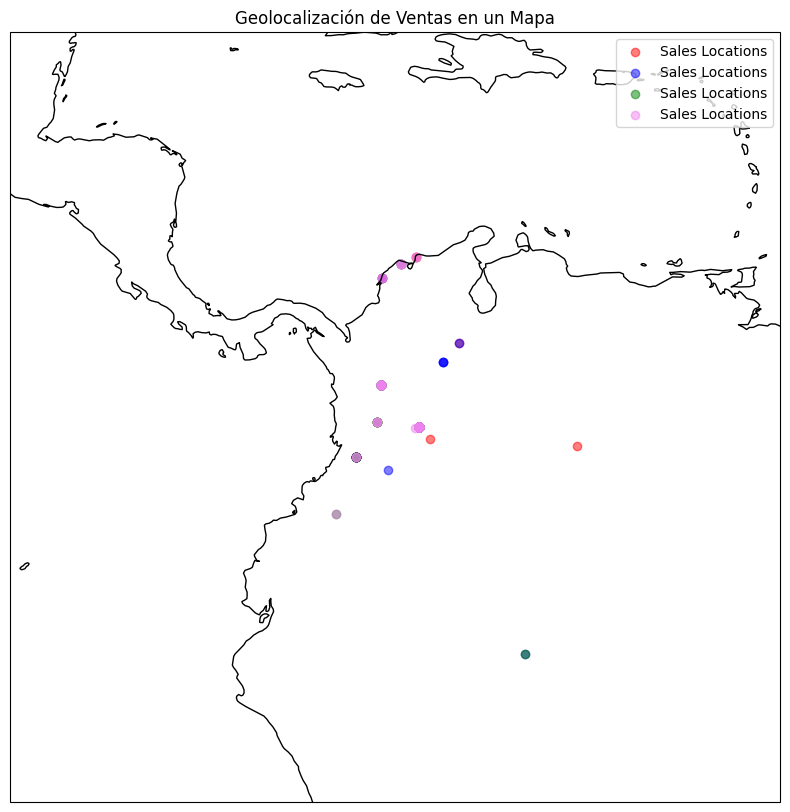

In [22]:
plt.figure(figsize=(10, 10))
# Creacion del mapa
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() # Lineas de costas
ax.set_extent([-120, -70, 0, 50]) # Extension del mapa (ajuste de coordenadas)

# Diagrama de dispersion sobre el mapa
plt.scatter(lat_lon_11['lon'], lat_lon_11['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='red', label='Sales Locations')
plt.scatter(lat_lon_22['lon'], lat_lon_22['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='blue', label='Sales Locations')
plt.scatter(lat_lon_33['lon'], lat_lon_33['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='green', label='Sales Locations')
plt.scatter(lat_lon_44['lon'], lat_lon_44['lat'], transform=ccrs.Geodetic(), alpha=0.5, color='violet', label='Sales Locations')


# Este limite lo calcule para poder centrar el mapa lo mejor posible
ax.set_xlim(-90, -60)
ax.set_ylim(-10, 20)

plt.title('Geolocalización de Ventas en un Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# y ahora se ve que son localidades distintas

Latitud de Buenos Aires: -34.6036
Longitud de Buenos Aires: -58.3837


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


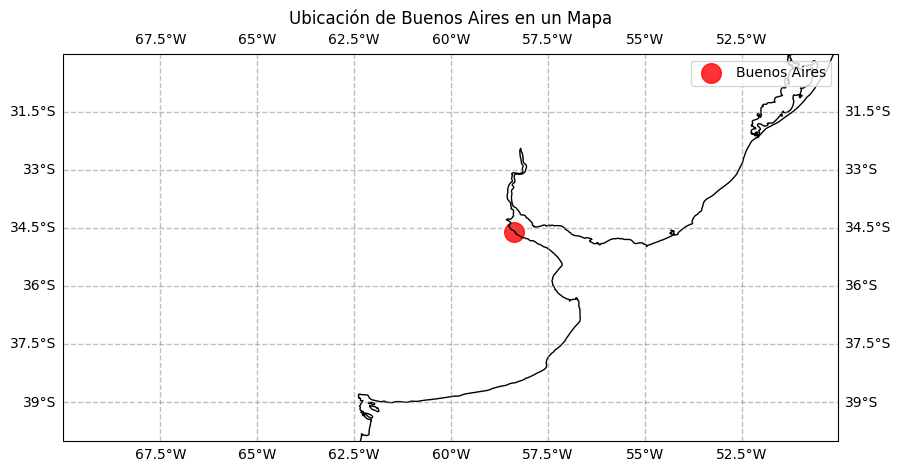

In [23]:
#************************************************************************************
# Esto es fuera del trabajo
#--------------------------
# Tanto me entusiasmo este trabajo que aqui esta el plot de mi ciudad de Buenos Aires
#************************************************************************************

latitud_buenos_aires = -34.6036
longitud_buenos_aires = -58.3837

print(f"Latitud de Buenos Aires: {latitud_buenos_aires}")
print(f"Longitud de Buenos Aires: {longitud_buenos_aires}")

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-70, -50, -40, -30])

plt.scatter(longitud_buenos_aires, latitud_buenos_aires, transform=ccrs.Geodetic(), alpha=0.8, color='red', s=200, label='Buenos Aires')

plt.title('Ubicación de Buenos Aires en un Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
plt.legend()
plt.show()

Latitud de Buenos Aires: -34.6036
Longitud de Buenos Aires: -58.3837
Latitud de Montevideo: -34.6036
Longitud de Montevideo: -58.3837


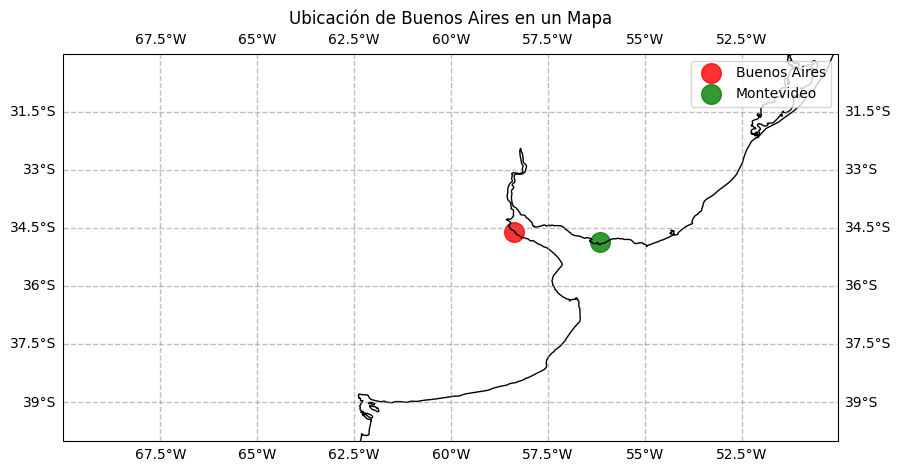

In [24]:
# Mas luego descubri "pip install geopy", pero lo dejo para otro momento.
# Solo agregue la vecina ciudad de Montevideo (Uruguay)

latitud_buenos_aires = -34.6036
longitud_buenos_aires = -58.3837

latitud_montevideo = -34.8535
longitud_montevideo = -56.1647

print(f"Latitud de Buenos Aires: {latitud_buenos_aires}")
print(f"Longitud de Buenos Aires: {longitud_buenos_aires}")
print(f"Latitud de Montevideo: {latitud_buenos_aires}")
print(f"Longitud de Montevideo: {longitud_buenos_aires}")

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-70, -50, -40, -30])

plt.scatter(longitud_buenos_aires, latitud_buenos_aires, transform=ccrs.Geodetic(), alpha=0.8, color='red', s=200, label='Buenos Aires')
plt.scatter(longitud_montevideo, latitud_montevideo, transform=ccrs.Geodetic(), alpha=0.8, color='green', s=200, label='Montevideo')

plt.title('Ubicación de Buenos Aires en un Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
plt.legend()
plt.show()

# CONCLUSIONES

Basado en los análisis realizados y los gráficos generados respecto de los valores entregados de las ventas de las tiendas 1 al 4, y teniendo como premisa que el dueño de las mismas debe tomar la decisión de vender una de las mismas, se informa:


•	**Se observa que los ingresos generados por ventas son muy similares, evidenciando que la menor producción es para la tienda 4.**

* Facturación Tienda 1: $1150880400,00

* Facturación Tienda 2: $1116343500.00

* Facturación Tienda 3: $1098019600.00

* Facturación Tienda 4: $1038375700.00

Facturación de todas las tiendas: $4403619200.00


•	**Se observa tambien que la tienda 4 es la que genera menos ingresos por envíos (pero podria ser tambien la que menos gastos de envio ha generado), aunque las diferencias entre los promedios de envio de las tiendas son poco significativas respecto de las ventas totales.**

Envío promedio por tienda:

* Tienda 1: $26018.61

* Tienda 2: $25216.24

* Tienda 3: $24805.68

* Tienda 4: $23459.46


•	**La distribución y ranking de productos vendidos por tienda es la siguiente, pero no se observa un relevante diferencia en la distribución de los productos.**

Tienda 1 - TOP 3 productos que MÁS dinero generaron:

1. TV LED UHD 4K - Ingresos: $142150200.00

2. Refrigerador - Ingresos: $112143300.00

3. Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:

1. Cuerda para saltar - Ingresos: $652800.00

2. Dinosaurio Rex - Ingresos: $688900.00

3. Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:

1. Iphone 15 - Ingresos: $113225800.00

2. TV LED UHD 4K - Ingresos: $103375000.00

3. Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:

1. Cubo mágico 8x8 - Ingresos: $643600.00

2. Dinosaurio Rex - Ingresos: $770300.00

3. Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:

1. Refrigerador - Ingresos: $99889700.00

2. TV LED UHD 4K - Ingresos: $96669100.00

3. Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:

1. Cubo mágico 8x8 - Ingresos: $640400.00

2. Dinosaurio Rex - Ingresos: $795600.00

3. Cuerda para saltar - Ingresos: $853800.00

Tienda 4 - TOP 3 productos que MÁS dinero generaron:

1. Iphone 15 - Ingresos: $96697500.00

2. TV LED UHD 4K - Ingresos: $90295300.00

3. Smart TV - Ingresos: $82790400.00

Tienda 4 - TOP 3 productos que MENOS dinero generaron:

1. Cuerda para saltar - Ingresos: $704800.00

2. Cubo mágico 8x8 - Ingresos: $748400.00

3. Dinosaurio Rex - Ingresos: $858100.00


•	**Además, si bien no es la peor calificada, es la ante ultima, tal como lo demuestra la siguiente estadística**

* Calificación promedio de la Tienda 1: 3.98

* Calificación promedio de la Tienda 2: 4.04

* Calificación promedio de la Tienda 3: 4.05

* Calificación promedio de la Tienda 4: 4.00


•	**Si bien no se puede evaluar la relación ubicación_tienda/situación_barrio, y suponiendo que la misma es aproximadamente igual para las distintas tiendas, se observaría que la que convendría venderse es la tienda 4.**
